# Applied Statastics Project Solution


In [43]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

**PART A**

**1.**

In [44]:
"""
 1.A. 
 Total Planned to purchase Product A = 500
 Actually placed order for Product A = 600
 
"""
print(f'1.A is {500/600}')

"""
 1.B.

 the people who planned to purchase and actually placed an order = 400
 people planned to purchase = 500
 
"""
print(f'1.B is {400/500}')

1.A is 0.8333333333333334
1.B is 0.8


**2.**

Number of randomly selected manufactured items = n = 10 \
Probablity of failure = p = 0.05

Here bionom.pmf and binom.cdf can be used to calculate probablity of failure

In [45]:
n = 10
p = 0.05
k = np.arange(0,11) # Sample space
print(f'K = {k}')
binom = stats.binom.pmf(k = k, n = n, p = p)
print(f'binom = {binom}')

K = [ 0  1  2  3  4  5  6  7  8  9 10]
binom = [5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789062e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


In [46]:
print(f'2.A Probability that none of the items are defective = {binom[0]}')
print(f'2.B Probability that exactly one of the items is defective = {binom[1]}')
print(f'2.C Probability that two or fewer of the items are defective = {stats.binom.cdf(k=2, n = n, p = p) }')
print(f'2.D Probability that three or more of the items are defective = {1 - stats.binom.cdf(k=2, n = n, p = p) }')

2.A Probability that none of the items are defective = 0.5987369392383787
2.B Probability that exactly one of the items is defective = 0.3151247048623047
2.C Probability that two or fewer of the items are defective = 0.9884964426207031
2.D Probability that three or more of the items are defective = 0.01150355737929687


**3.**

Sample Space is unknown so we can construct poisson distribution. For this we can use stats.poisson.pmf() 


In [47]:
rate = 3
k = np.arange(0,20)

poisson = stats.poisson.pmf(k,rate)
poisson

array([4.97870684e-02, 1.49361205e-01, 2.24041808e-01, 2.24041808e-01,
       1.68031356e-01, 1.00818813e-01, 5.04094067e-02, 2.16040315e-02,
       8.10151179e-03, 2.70050393e-03, 8.10151179e-04, 2.20950322e-04,
       5.52375804e-05, 1.27471339e-05, 2.73152870e-06, 5.46305740e-07,
       1.02432326e-07, 1.80762929e-08, 3.01271548e-09, 4.75691918e-10])

In [48]:
# If probablity of selling 0 cars is p, then selling some cars can be 1 - p
print(f'3.A What is Probability that in a given week he will sell some cars? = {1 - poisson[0]}')

# Probablity of sell 2 or more but less than 5 cars is sum of p(2), p(3), P(4)
print(f'3.B What is Probability that in a given week he will sell 2 or more but less than 5 cars? = {poisson[2]+poisson[3]+poisson[4]}')

3.A What is Probability that in a given week he will sell some cars? = 0.950212931632136
3.B What is Probability that in a given week he will sell 2 or more but less than 5 cars? = 0.6161149710523164


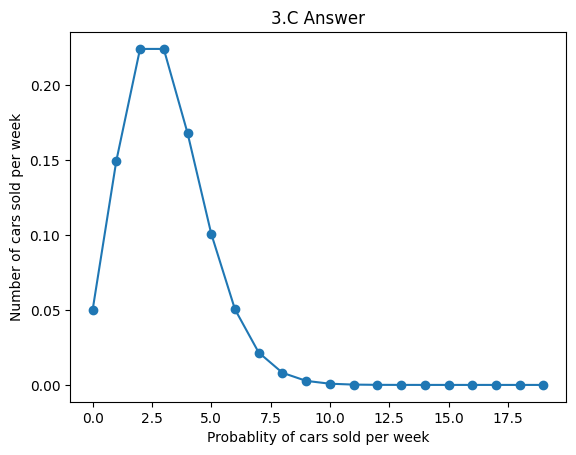

In [49]:
# 3.C
plt.plot(k, poisson, 'o-')
plt.xlabel('Probablity of cars sold per week')
plt.ylabel('Number of cars sold per week')
plt.title('3.C Answer')
plt.show()

**4.** \
In this problem statement there are 3 independant events of placing orders by person A, B and C. Each event (placed order) has equal chance of success i.e. 86.8% or 0.868.

In [50]:
# 4.A question demands probablity of simultanious occurance of A, B and C. Which can be calculated by multiplication rule i.e. P(A)*P(B)*P(C)
print(f'4.A the probability that all three orders will be recognised correctly is {(0.868*0.868*0.868)}')

# 4.B Probablity of none of order placed by A will be recognised is 1-P(A), similarly 1-P(B) and 1-P(C). Hence total 0 orders recognised is product of these probablities
print(f'4.B the probability that none of the three orders will be recognised correctly is {(1-0.868)**3}')

# 4.C Here need to calculate probability that at least two of the three orders will be recognised correctly which means minimum 2 orders should be success which
# also means P(>2) to be calculated, which also means 1-P(<2)

# We can derive that P(>2) = 1 - (P<2) and P(<2) = P(0)+P(1), 
# Calculating P(0)
P_0 = 1-0.868
P_1 = stats.binom.pmf(k=1,n=3,p=0.868)
P0_or_P1 = P_0+P_1
P_atleast_2 = 1 - P0_or_P1
print(f'4.C the probability that at least two of the three orders will be recognised correctly {P_atleast_2}')

4.A the probability that all three orders will be recognised correctly is 0.653972032
4.B the probability that none of the three orders will be recognised correctly is 0.0022999680000000003
4.C the probability that at least two of the three orders will be recognised correctly 0.822627904


**5.**

**semiconductor Industry**

In semiconductor manufacturing, the production of integrated circuits involves numerous complex steps, and any variation or defect in the process can lead to faulty or low-quality chips. To ensure high-quality production, statistical analysis can be employed to monitor and control the manufacturing proces by collecting and analyzing data from the production line to identify any variations or abnormalities that may affect the quality of the chips.

Suppose 'BillionWafer' semiconductor company is manufacturing microcontrollers for embedded systems. The company wants to optimize the manufacturing process to minimize defects and ensure consistent quality. They can use applied statistics to address this challenge.

# ========================================================

# PART B

Sports - Basketball

PART B . Q1

In [51]:
# Importing Dataset
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Basketball.csv')
df = data.copy()
df.head()


Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
0  Team 1          86  4385        2762     1647        552       563   
1  Team 2          86  4262        2762     1581        573       608   
2  Team 3          80  3442        2614     1241        598       775   
3  Team 4          82  3386        2664     1187        616       861   
4  Team 5          86  3368        2762     1209        633       920   

  BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
0         5947        3140                 33        23       1929   
1         5900        3114                 25        25       1929   
2         4534        3309                 10         8       1929   
3         4398        3469                  6         6   1931to32   
4         4631        3700                  8         7       1929   

   HighestPositionHeld  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [52]:
df.shape

(61, 13)

Insights: Dataset has 61 rows and 13 columns

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB



*   Team, HighestPositionHeld and Tournament have correct datatypes
*   Score, PlayedGames, WonGames, DrawnGames, LostGames, BasketScored, BasketGiven, TournamentChampion, Runner-up and TeamLaunch should have numerical data but object type is given which needs to be corrected



In [54]:
df.tail()

Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
56  Team 57           1    34          38        8         10        20   
57  Team 58           1    22          30        7          8        15   
58  Team 59           1    19          30        7          5        18   
59  Team 60           1    14          30        5          4        21   
60  Team 61           1     -           -        -          -         -   

   BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
56           38          66                  -         -    2009-10   
57           37          57                  -         -    1956-57   
58           51          85                  -         -    1951~52   
59           34          65                  -         -    1955-56   
60            -           -                  -         -    2017~18   

    HighestPositionHeld  
56                   20  
57                   16  
58                   16  
59                   15  
60                    9



*   Looking at head and tail, null places are filled with - in most of the cells
*   TeamLaunch has range of year instead of single year.



In [55]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

**There are no null values, However null values are treated as '-', hence need to handle it**

**Handling Missing Values**

In [56]:
# Replacing '-' with NaN for better manipulation
df.replace("-", np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                60 non-null     object
 3   PlayedGames          60 non-null     object
 4   WonGames             60 non-null     object
 5   DrawnGames           60 non-null     object
 6   LostGames            60 non-null     object
 7   BasketScored         60 non-null     object
 8   BasketGiven          60 non-null     object
 9   TournamentChampion   9 non-null      object
 10  Runner-up            13 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


**Analysis**
*   Score to BasketGiven has 1 missing value from each which indicates there might be single row which has lot of missing attributes, it can be filled up with meadians.
*   TournamentChampion and Runner-up has highest missing data




In [57]:
# Convert Score to BasketGiven Column into numarical
for colmn in df.columns[2:9]:
  df[colmn] = pd.to_numeric(df[colmn])
df.info()

# Replace NaN with median Score to BasketGiven
for colmn in df.columns[2:9]:
    df[colmn].fillna(value=df[colmn].median(), inplace=True)
df.loc[60,]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 61 non-null     object 
 1   Tournament           61 non-null     int64  
 2   Score                60 non-null     float64
 3   PlayedGames          60 non-null     float64
 4   WonGames             60 non-null     float64
 5   DrawnGames           60 non-null     float64
 6   LostGames            60 non-null     float64
 7   BasketScored         60 non-null     float64
 8   BasketGiven          60 non-null     float64
 9   TournamentChampion   9 non-null      object 
 10  Runner-up            13 non-null     object 
 11  TeamLaunch           61 non-null     object 
 12  HighestPositionHeld  61 non-null     int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 6.3+ KB


Team                   Team 61
Tournament                   1
Score                    395.5
PlayedGames              424.5
WonGames                 124.0
DrawnGames                98.5
LostGames                197.5
BasketScored             444.0
BasketGiven              632.5
TournamentChampion         NaN
Runner-up                  NaN
TeamLaunch             2017~18
HighestPositionHeld          9
Name: 60, dtype: object

In [58]:
# TournamentChampion and Runner-up missing data handling
# Changing runner up column name
df['RunnerUp'] = df['Runner-up'].copy()
df.drop('Runner-up', axis=1, inplace=True)

print(df.TournamentChampion.value_counts(normalize=True, dropna=False))
print(df.RunnerUp.value_counts(normalize=True, dropna=False))

# As TournamentChampion has 85% missing values and RunnerUp has 78% missing values these two won't give much information for analysis
df.drop(['TournamentChampion', 'RunnerUp'], axis=1, inplace=True)

# Handling TeamLaunch Column
df['TeamLaunch'] = df['TeamLaunch'].apply(lambda yr: str(yr)[:4])
df['TeamLaunch'] = pd.to_numeric(df['TeamLaunch'])
df.head()

NaN    0.852459
1      0.049180
33     0.016393
25     0.016393
10     0.016393
6      0.016393
8      0.016393
2      0.016393
Name: TournamentChampion, dtype: float64
NaN    0.786885
1      0.081967
23     0.016393
25     0.016393
8      0.016393
6      0.016393
7      0.016393
4      0.016393
3      0.016393
5      0.016393
Name: RunnerUp, dtype: float64


Team  Tournament   Score  PlayedGames  WonGames  DrawnGames  LostGames  \
0  Team 1          86  4385.0       2762.0    1647.0       552.0      563.0   
1  Team 2          86  4262.0       2762.0    1581.0       573.0      608.0   
2  Team 3          80  3442.0       2614.0    1241.0       598.0      775.0   
3  Team 4          82  3386.0       2664.0    1187.0       616.0      861.0   
4  Team 5          86  3368.0       2762.0    1209.0       633.0      920.0   

   BasketScored  BasketGiven  TeamLaunch  HighestPositionHeld  
0        5947.0       3140.0        1929                    1  
1        5900.0       3114.0        1929                    1  
2        4534.0       3309.0        1929                    1  
3        4398.0       3469.0        1931                    1  
4        4631.0       3700.0        1929                    1

As we have dropped TournamentChampion and RunnerUp performance indicator. Need to check if we can derive performance of team based on other parameters
*   WinPercent: This will give percent games won by team (WonGames/PlayedGames)
*   LosePercent: This will give percent games lost by team (LostGames/PlayedGames)
*   BasketScored to BasketGiven ratio: BasketScored/BasketGiven
*   win to lose ratio: WonGames/LostGames




In [59]:
# Adding new columns
df['WinPercent'] = df['WonGames']/df['PlayedGames']
df['LosePercent'] = df['LostGames']/df['PlayedGames']
df['BS2BG'] = df['BasketScored']/df['BasketGiven']
df['W2L'] = df['WonGames']/df['LostGames']
df.head(2)

Team  Tournament   Score  PlayedGames  WonGames  DrawnGames  LostGames  \
0  Team 1          86  4385.0       2762.0    1647.0       552.0      563.0   
1  Team 2          86  4262.0       2762.0    1581.0       573.0      608.0   

   BasketScored  BasketGiven  TeamLaunch  HighestPositionHeld  WinPercent  \
0        5947.0       3140.0        1929                    1    0.596307   
1        5900.0       3114.0        1929                    1    0.572411   

   LosePercent     BS2BG       W2L  
0     0.203838  1.893949  2.925400  
1     0.220130  1.894669  2.600329

**Univariate Analysist**

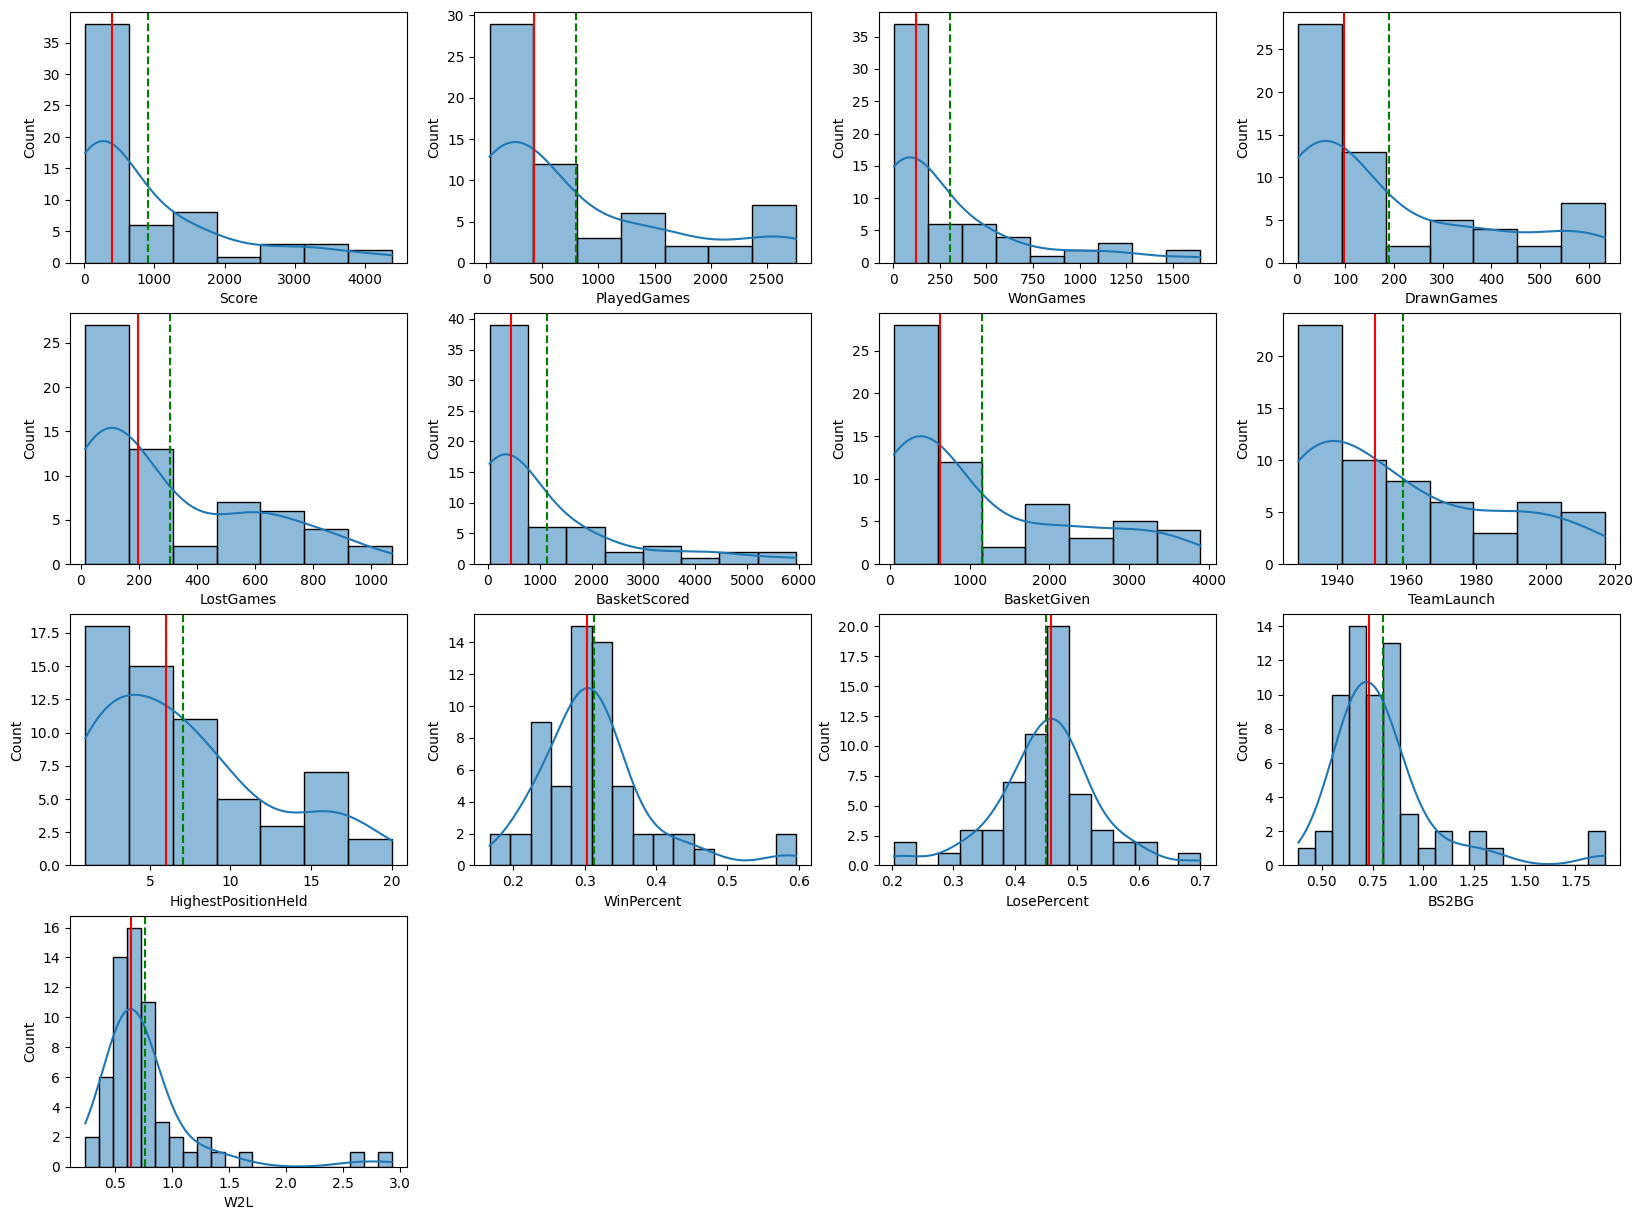

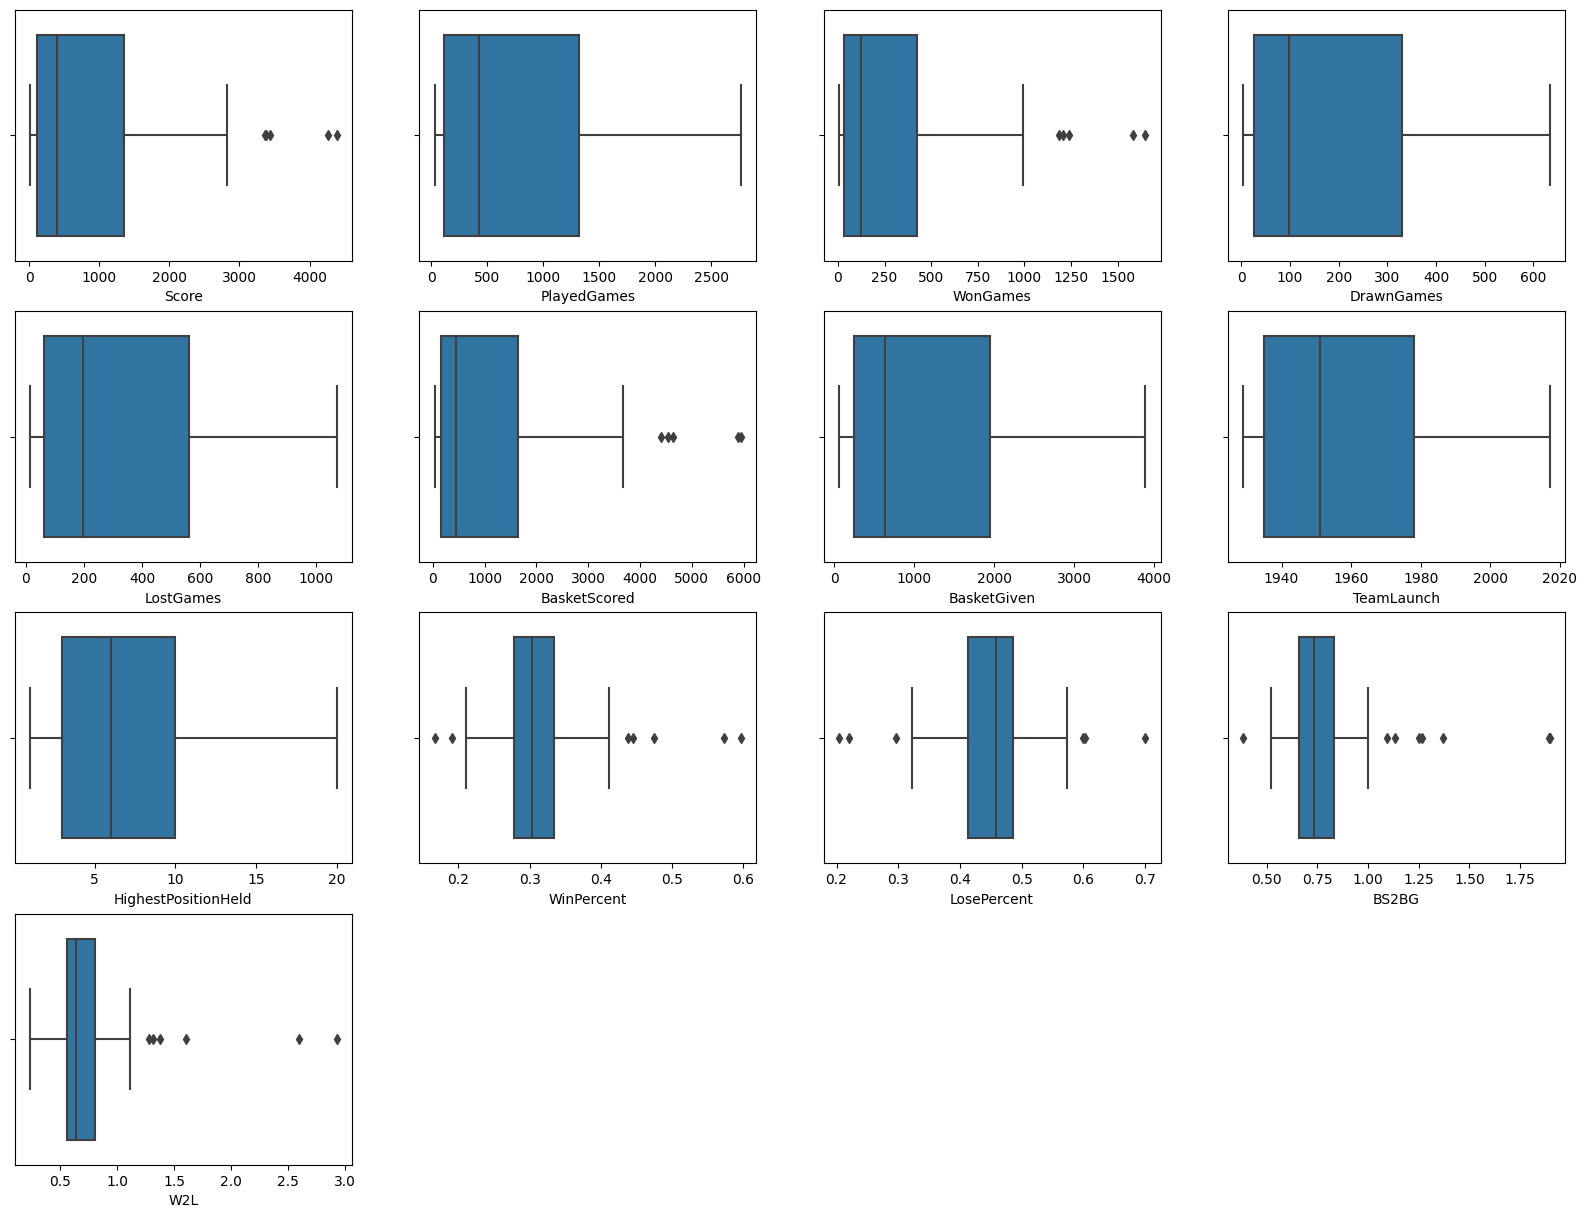

In [60]:
plt.figure(figsize=(20,15))
for i, f in enumerate(df.columns[2:]):
  ax=plt.subplot(4,4,i+1)
  sns.histplot(df[f],  kde=True)
  ax.axvline(df[f].mean(), color="green", linestyle="--")  # Add mean to the histogram
  ax.axvline(df[f].median(), color="Red", linestyle="-")  # Add median to the histogram
plt.show()
plt.figure(figsize=(20,15))
for i, f in enumerate(df.columns[2:]):
  plt.subplot(4,4,i+1)
  sns.boxplot(data=df,x=f)


**Observations on Numerical**

**Observations:**

Scored, PlayedGames, WonGames, DrawnGames, LostGames, BasketScored, BasketGiven, Team Launch, HighestPositionHeld are highly right skewed with few of them having outliers
WinPercent, LosePercent, BS2BG, W2L are likely to be normally distributed
There are 12 to 14 teams with highest WenPercent
There are 20 teams with highest LosePercent
There are 12 to 14 teams BS2BG highest ratio
There are 10 to 15 teams with highest W2L ratio

**Theory:**

There are 12 to 14 high performing teams and there are 10 to 15 low performing teams

**Bibvariate Analysis**

In [61]:
print(f'\nHighest values')
for j in df.columns[2:]:
  max = eval('df.{0}.max()'.format(j))
  print(f'\nHighest team with feature {j} {max}')
  print(df['Team'].loc[df[j]==max])
print('-------------------------------------------------')
print(f'\Lowest values')
for j in df.columns[2:]:
  min = eval('df.{0}.min()'.format(j))
  print(f'\nLowest team with feature {j} ({min})')
  print(df['Team'].loc[df[j]==min])



Highest values

Highest team with feature Score 4385.0
0    Team 1
Name: Team, dtype: object

Highest team with feature PlayedGames 2762.0
0    Team 1
1    Team 2
4    Team 5
Name: Team, dtype: object

Highest team with feature WonGames 1647.0
0    Team 1
Name: Team, dtype: object

Highest team with feature DrawnGames 633.0
4    Team 5
Name: Team, dtype: object

Highest team with feature LostGames 1070.0
6    Team 7
Name: Team, dtype: object

Highest team with feature BasketScored 5947.0
0    Team 1
Name: Team, dtype: object

Highest team with feature BasketGiven 3889.0
6    Team 7
Name: Team, dtype: object

Highest team with feature TeamLaunch 2017
60    Team 61
Name: Team, dtype: object

Highest team with feature HighestPositionHeld 20
56    Team 57
Name: Team, dtype: object

Highest team with feature WinPercent 0.5963070238957278
0    Team 1
Name: Team, dtype: object

Highest team with feature LosePercent 0.7
59    Team 60
Name: Team, dtype: object

Highest team with feature BS2BG 

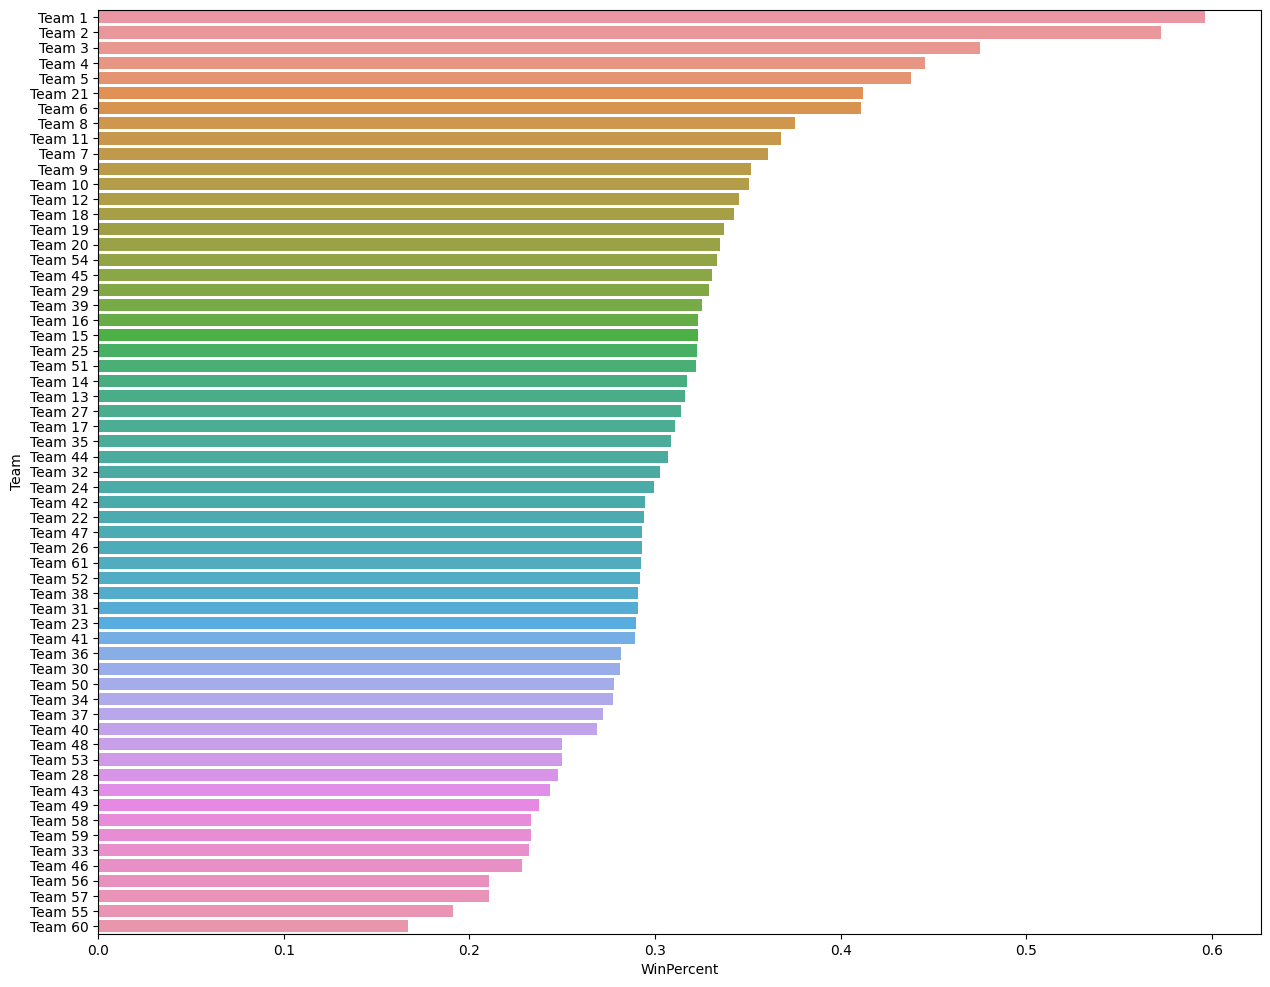

In [62]:
# Team vs WinPercent
plt.figure(figsize=(15,12))
sns.barplot(df,y='Team',x='WinPercent', order=df.sort_values('WinPercent',ascending = False).Team);

Team1 has highest win percent; Team 60 has lowest win percent

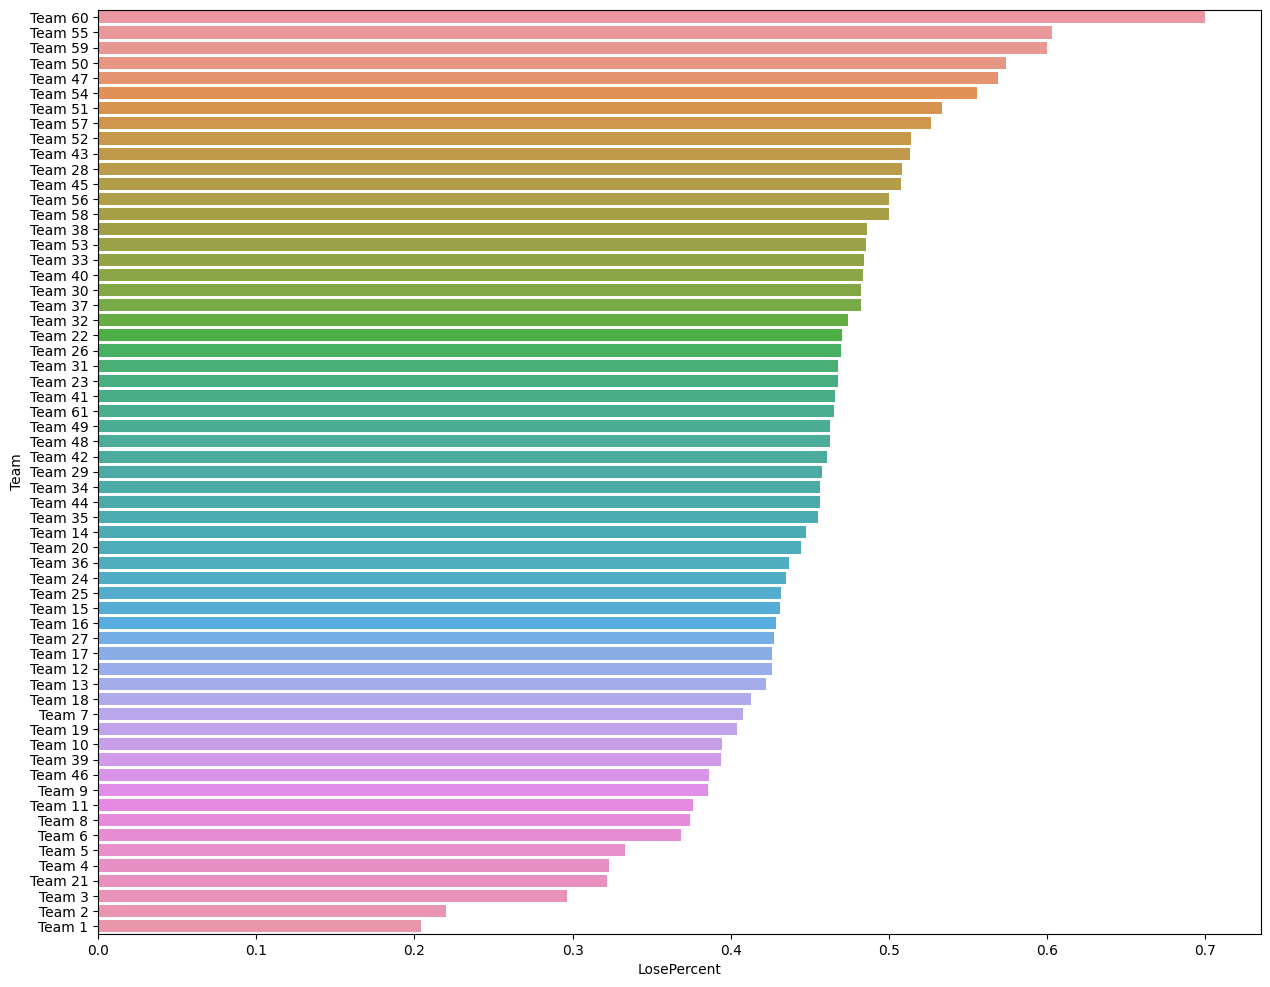

In [63]:
# Team vs LosePercent
plt.figure(figsize=(15,12))
sns.barplot(df,y='Team',x='LosePercent', order=df.sort_values('LosePercent',ascending = False).Team);

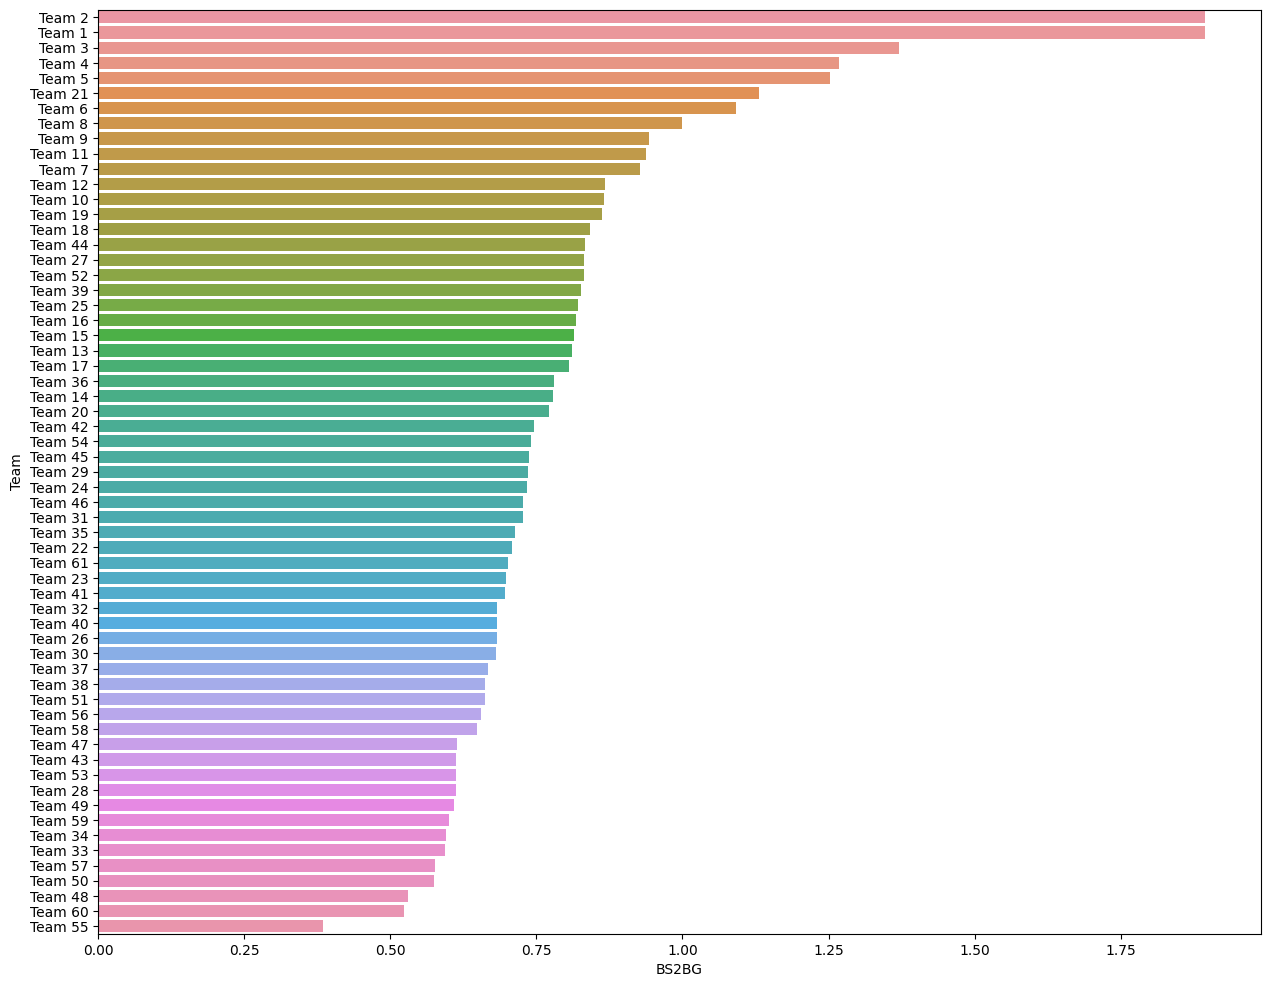

In [64]:
# Team vs BS2BG
plt.figure(figsize=(15,12))
sns.barplot(df,y='Team',x='BS2BG', order=df.sort_values('BS2BG',ascending = False).Team);

Team 1 has highest Basket Scored to Basket Given ratio

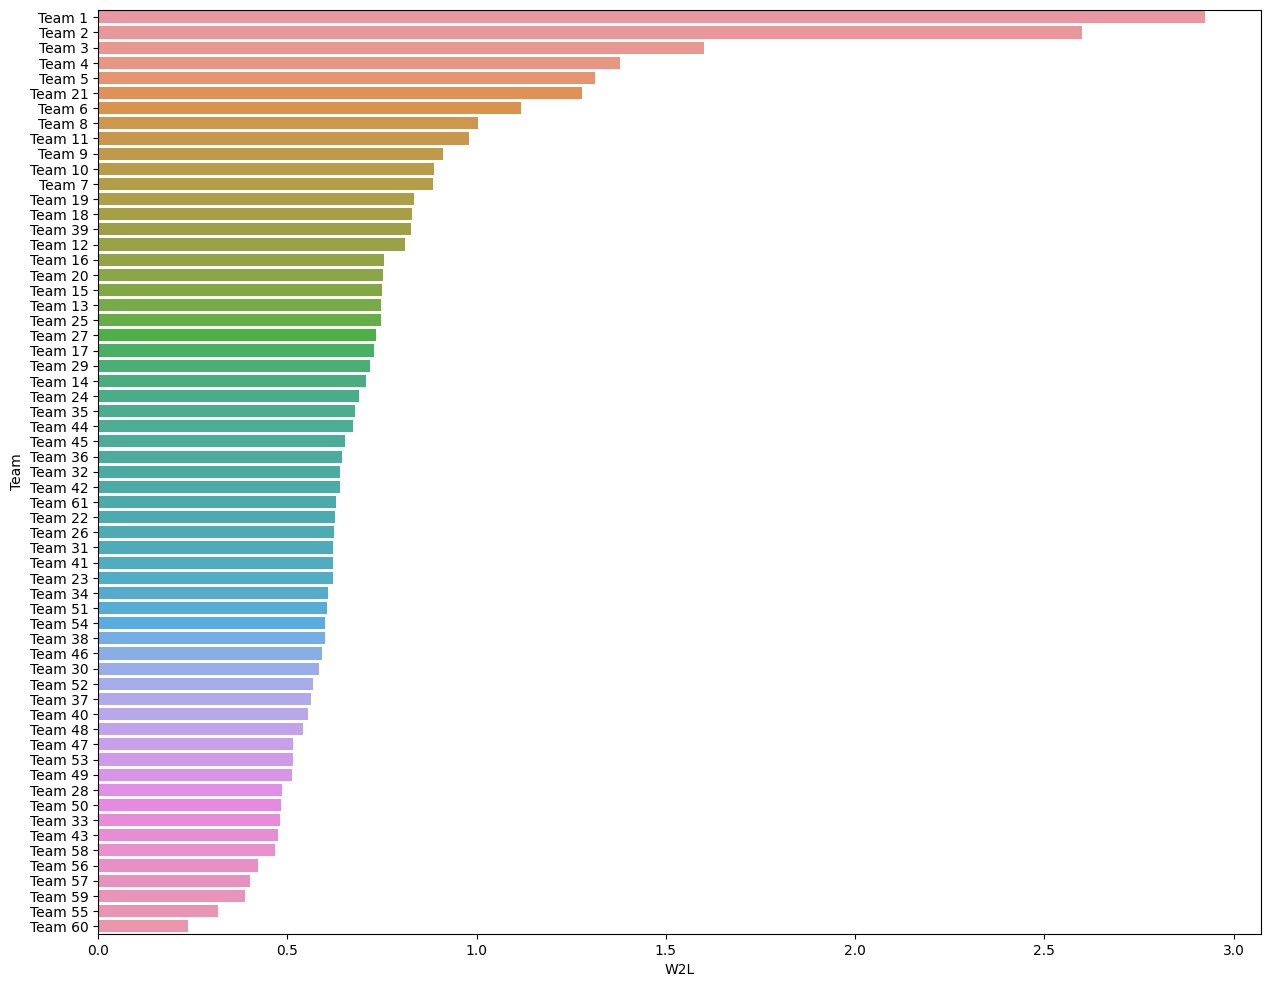

In [65]:
# Team vs win to lose
plt.figure(figsize=(15,12))
sns.barplot(df,y='Team',x='W2L', order=df.sort_values('W2L',ascending = False).Team);

Team 1 has highest Win to lose ratio

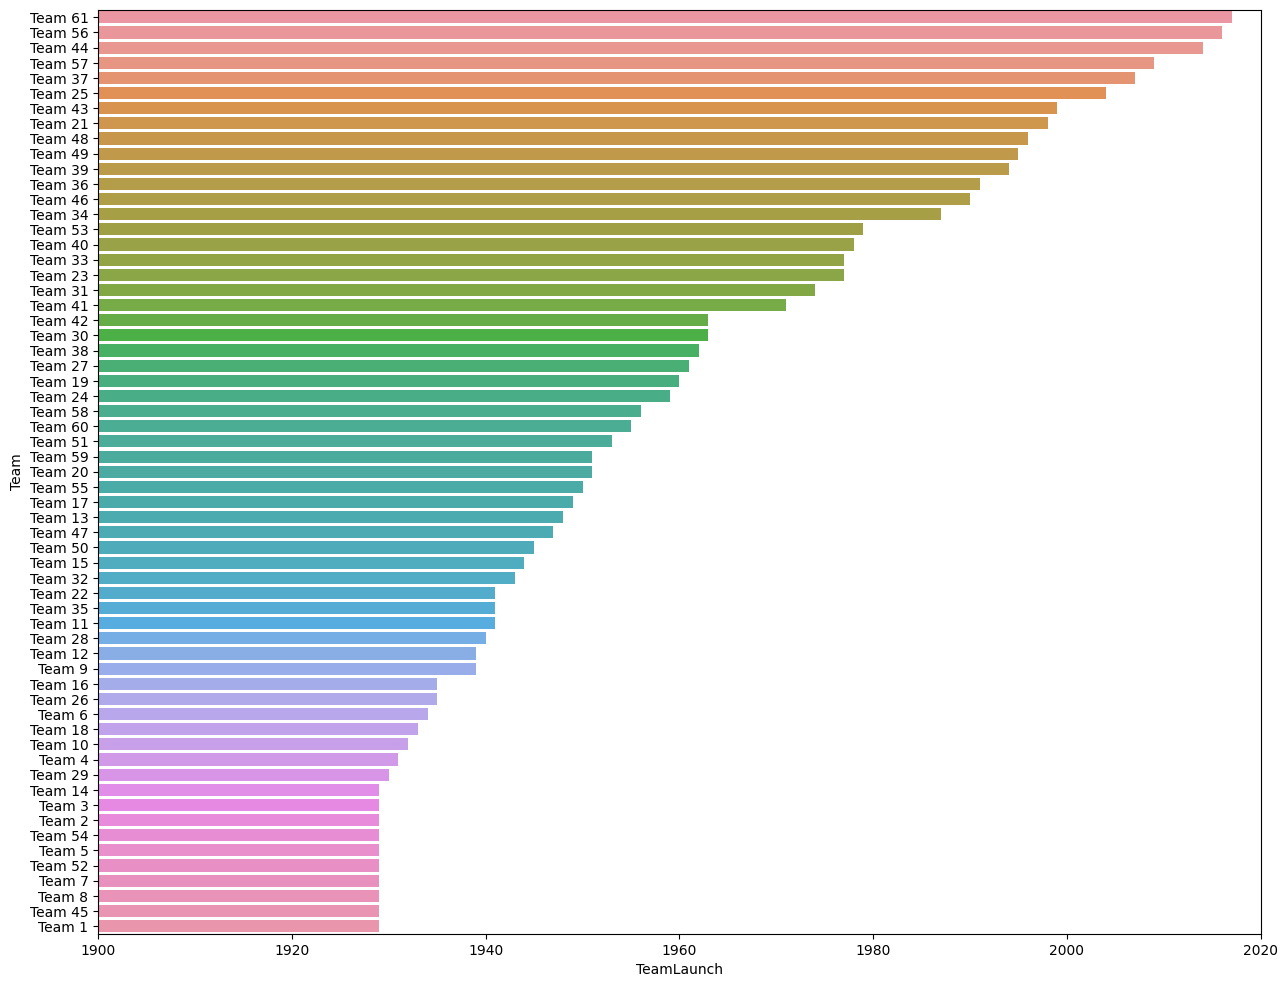

In [66]:
# newest to oldest team
fig, ax = plt.subplots(figsize=(15, 12))
sns.barplot(df,y='Team',x='TeamLaunch', order=df.sort_values('TeamLaunch',ascending = False).Team,);
ax.set_xlim(1900, 2020)
plt.show()

Most Matured Teams: 1, 45, 8, 7, 52, 2, 3, 14
Less Matured team: 61, 56

**MultiVariate Analysis**

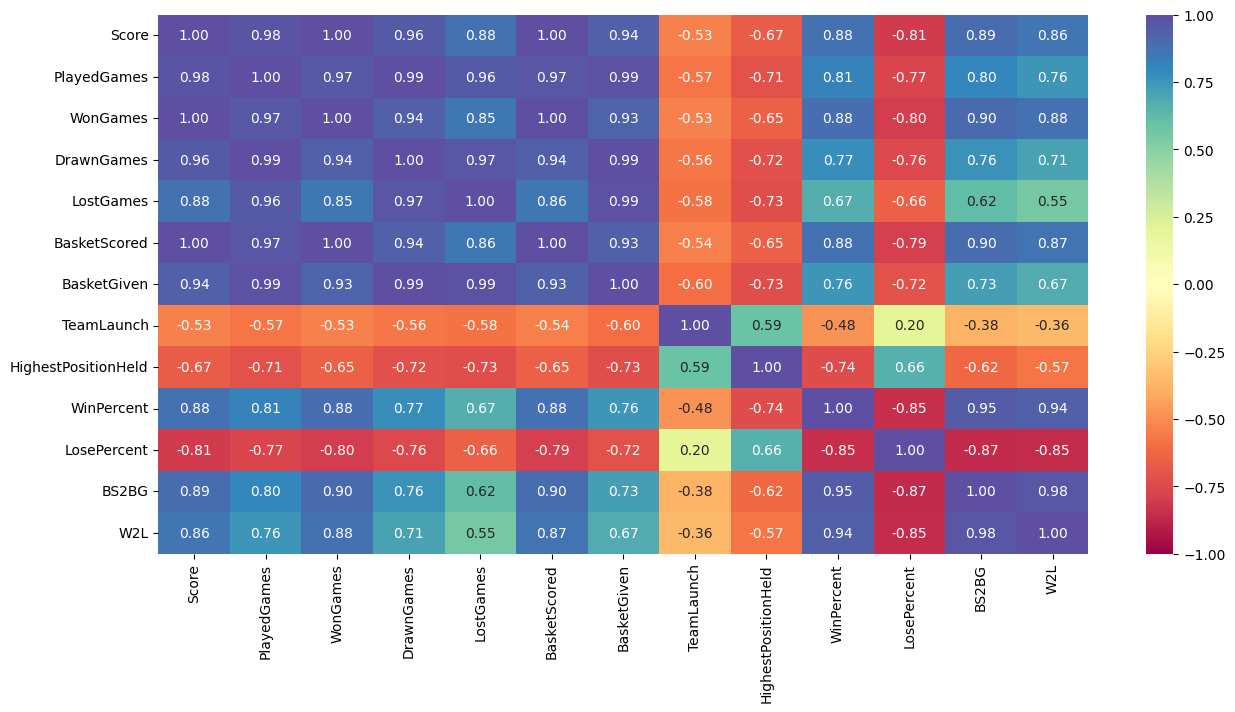

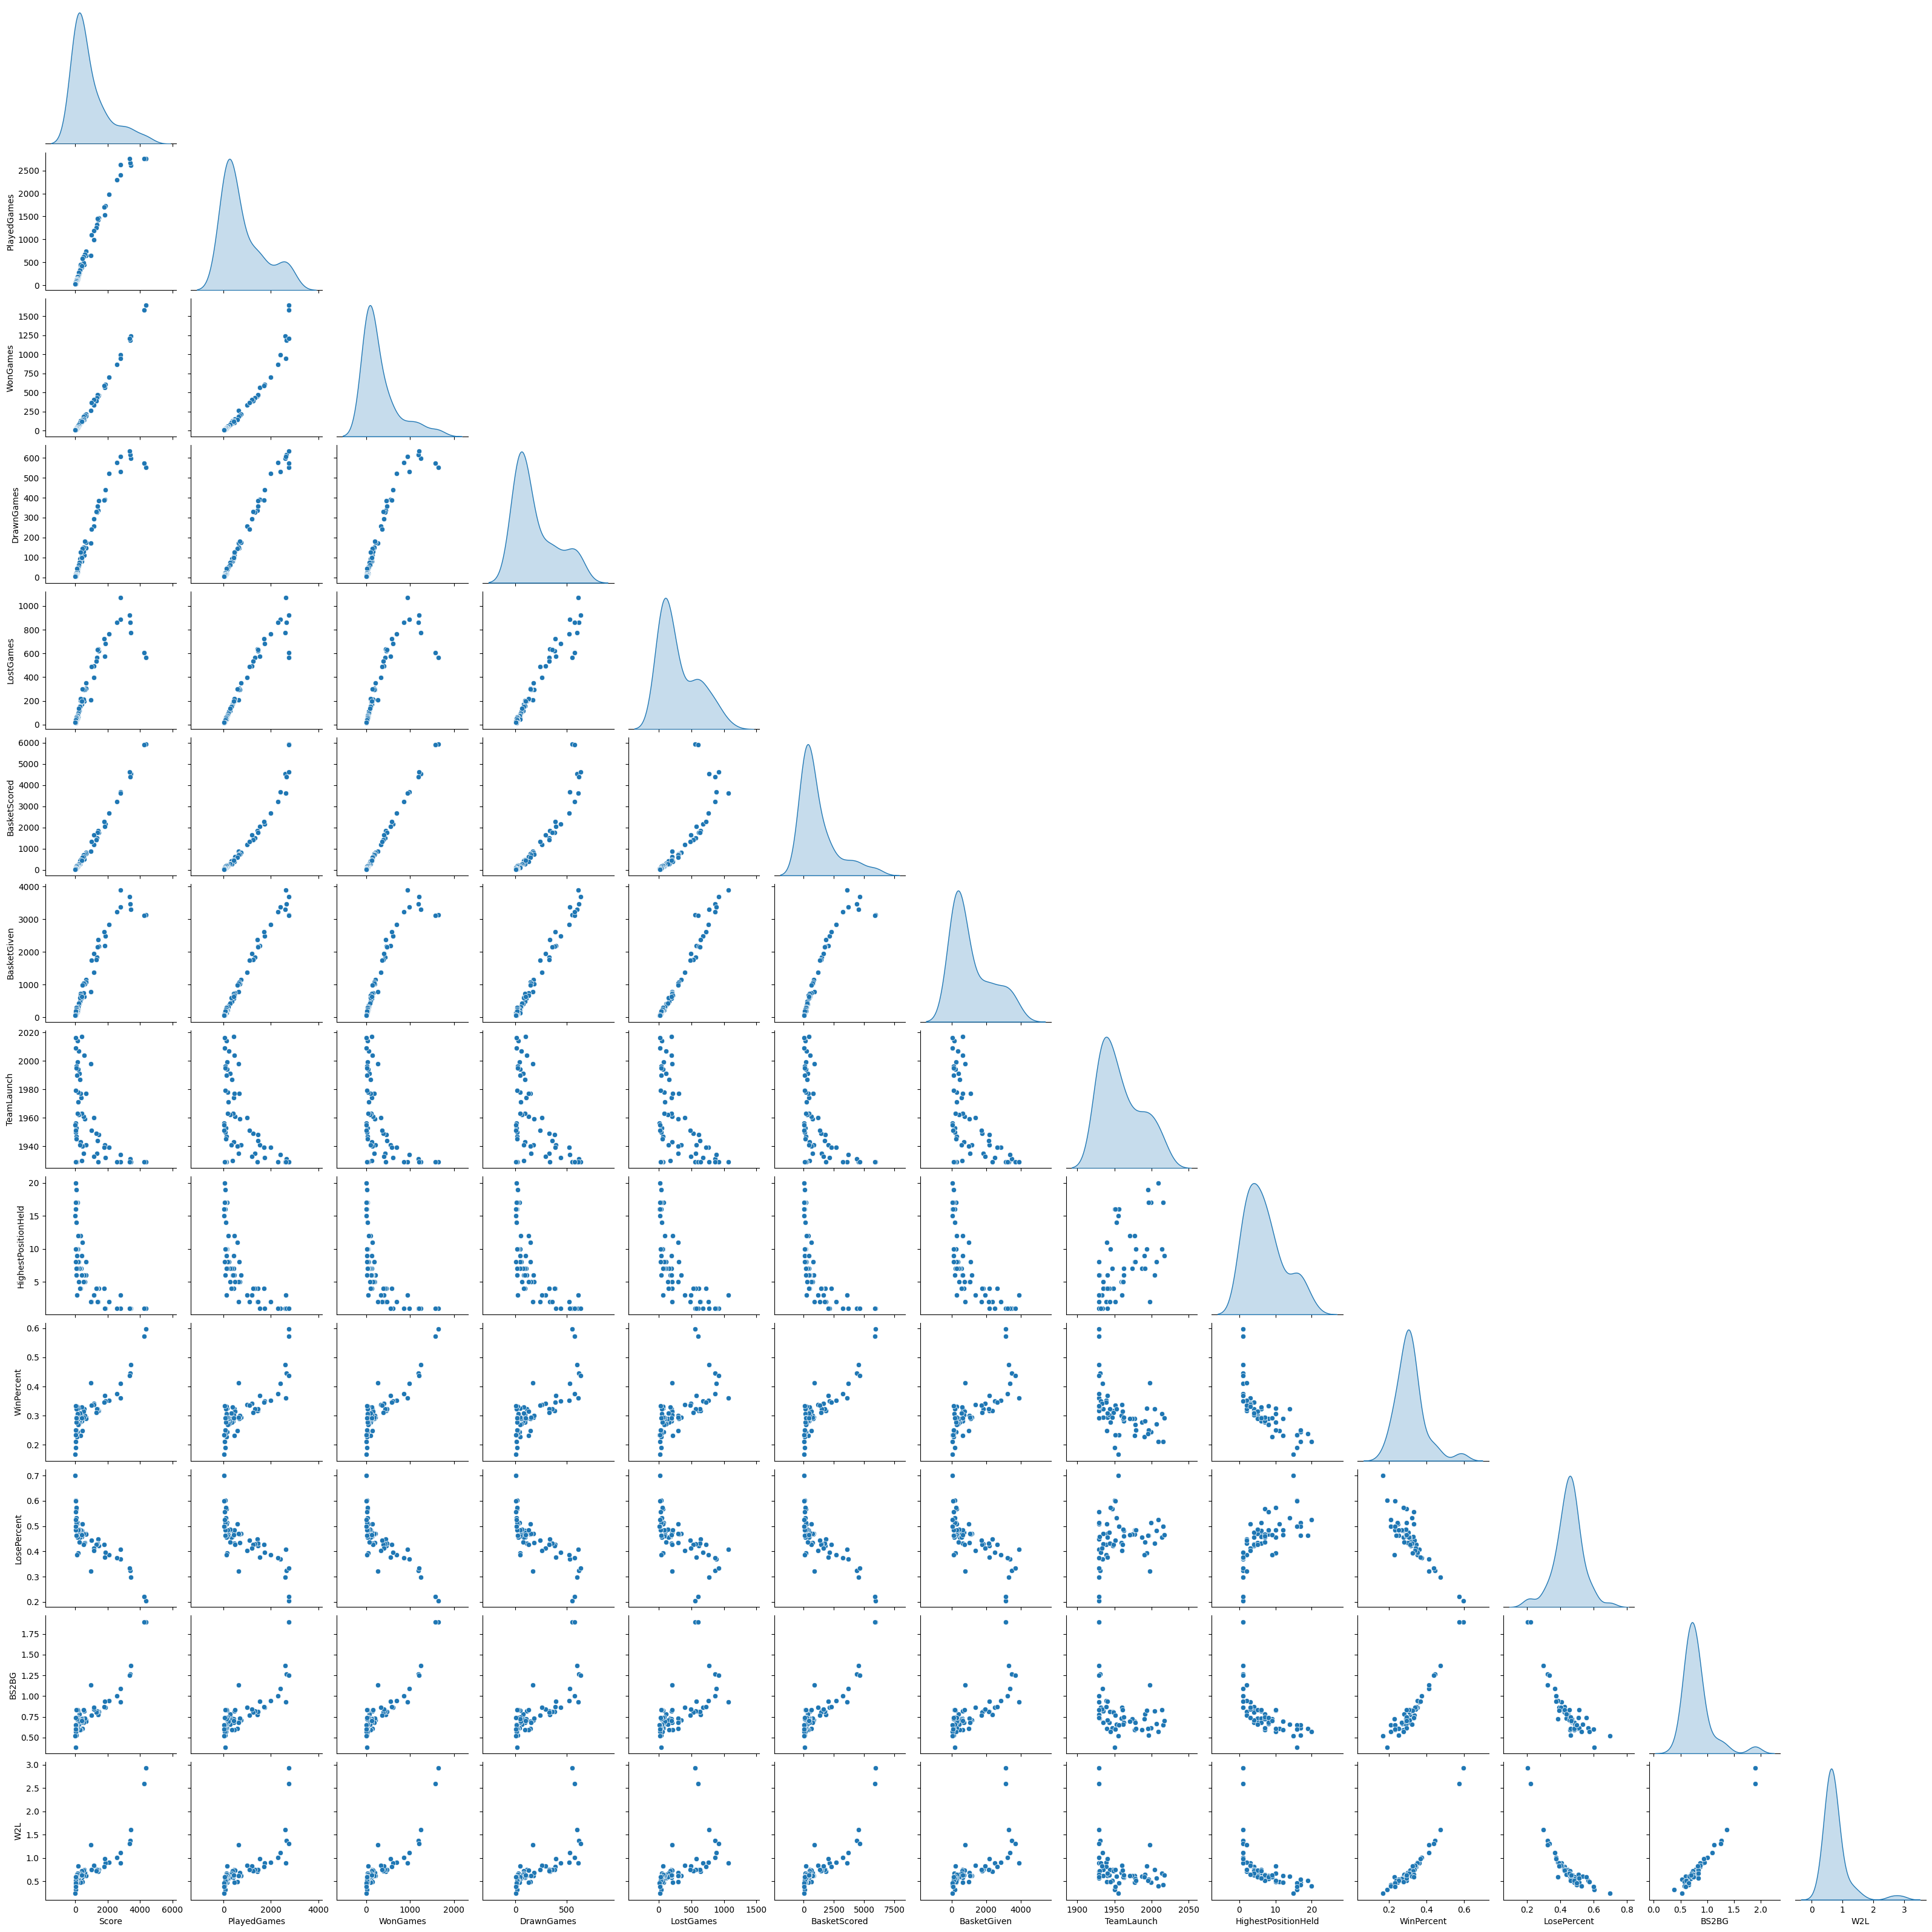

In [67]:
# Correlation Matrix
arr = df.columns[2:]
corr = df[arr].corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

sns.pairplot(data=df[arr], diag_kind="kde", corner=True)
plt.show()

**Observation Summary**

1.   There is Highly Positive Correlation between WonGames-Score, BasketScored-WonGames, BS2BG-WonGames, BS2BG-WinPercent, W2L-WonGames-WinPercent, w2L-BS2BG
2.   There is Highly Negative Correlation between BS2BG-LosePercent, W2L-LosePercent
3.   This Means the teams which has more BS2BG ratio and W2L ratio tends to win more games, and are performing better overall
4.   Teams which has less BS2BG and W2L are often worst performing teams
5.   There is no relation in Launch year and team performance. Maturity of team is not deciding factor of performance
6.   Team which has total scored more has better BS2BG and W2L ratio
7.   Team which has basketScored more tends to win games and teams which  given higher baskets tends to draw or lose the game equally
8.   Team 1 has scored highest basket and won highest games also team 7 has given highest basket and lost highest games
9.   Team 1, Team 2 and Team 3 are highest performing teams, and it is recommended to management to invest in such teams
10.   Team 60, Team 55 and Team 57 are worst performing teams and management should avoid such teams
11.   Overall Team 1 is top performing team and Team 60 is the worst

**Suggestions to Improve data**
1.  Need to collect proper data on TournamentsWon and RunnerUp features, with improved data collection on these feature more insigts can be given on tornament/league level
2.  New features like highest scoring individuals per tournament can give insights on good players are often coming from which team







# ========================================================


# PART C

# Startup ecosystem

**Q1: Read the CSV file.**

In [68]:
# Importing Dataset
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/CompanyX_EU.csv')
df = data.copy()
df.head()


Startup             Product Funding             Event  \
0           2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1             3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2      3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3       3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4  42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   

            Result OperatingState  
0       Contestant      Operating  
1       Contestant         Closed  
2       Contestant      Operating  
3  Audience choice      Operating  
4       Contestant      Operating

**Q2. Data Exploration:**

In [69]:
# Get rows and Column
df.shape

(662, 6)

In [70]:
# A. Check the datatypes of each attribute.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


All The data types are object type

In [71]:
# B. Check for null values in the attributes.
df.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

In [72]:
print(df.Product.value_counts(normalize=True, dropna=False)[0]*100)
print(df.Funding.value_counts(normalize=True, dropna=False)[0]*100)

0.906344410876133
32.3262839879154


Product and Funding has null values of 0.9% and 32.33% respectively.

**Q3. Data preprocessing & visualisation:**

In [73]:
# A. Drop the null values
df=df.dropna().copy(deep=True)
df.head()

Startup          Product Funding                      Event  \
1           3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3     3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5           5to1         5to1.com  $19.3M                  TC50 2009   
6   8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10    AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   

             Result OperatingState  
1        Contestant         Closed  
3   Audience choice      Operating  
5        Contestant       Acquired  
6          Finalist      Operating  
10       Contestant      Operating

After dropping NaN number of rows reduced to 446

In [74]:
# B. Convert the ‘Funding’ features to a numerical value.
df.loc[:,'Funds_in_Million']=df['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1]=='K' else (float(x[1:-1])*1000 if x[-1]=='B' else float(x[1:-1])))
df.head()

Startup          Product Funding                      Event  \
1           3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3     3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5           5to1         5to1.com  $19.3M                  TC50 2009   
6   8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10    AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   

             Result OperatingState  Funds_in_Million  
1        Contestant         Closed              0.63  
3   Audience choice      Operating              1.00  
5        Contestant       Acquired             19.30  
6          Finalist      Operating             29.00  
10       Contestant      Operating              1.80

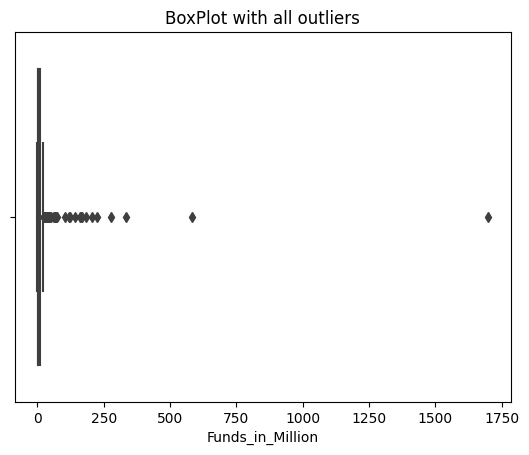

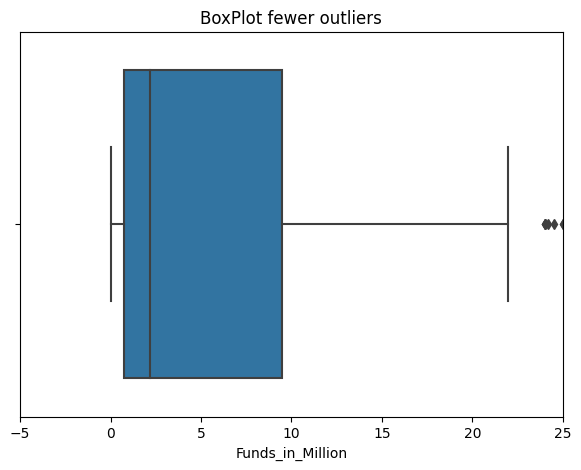

In [75]:
# C.Plot box plot for funds in million.
sns.boxplot(data=df, x='Funds_in_Million')
plt.title('BoxPlot with all outliers')
plt.show()
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=df, x='Funds_in_Million')
plt.title('BoxPlot fewer outliers')
ax.set_xlim(-5,25)
plt.show()

From Funds_in_Million box plot, it is extremly right skewed. Having maximum outliers on higher side.

In [76]:
# D. Check the number of outliers greater than the upper fence
Q1=df['Funds_in_Million'].quantile(0.25)
Q3=df['Funds_in_Million'].quantile(0.75)
IQR=Q3-Q1

upper_fence=Q3+(1.5*IQR)
print('Upper Fence =',upper_fence)

print('Outliers beyond upper fence =',df[df['Funds_in_Million']>upper_fence].shape[0])

Upper Fence = 22.569625
Outliers beyond upper fence = 60


In [77]:
# E.Check frequency of the OperatingState features classes.
df.OperatingState.value_counts()


Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

Here we should drop the outliers but surprisingly question did not ask for dropping ourliers.

There are 389 componies operating and 57 closed

**Q4 Statistical Analysis:**

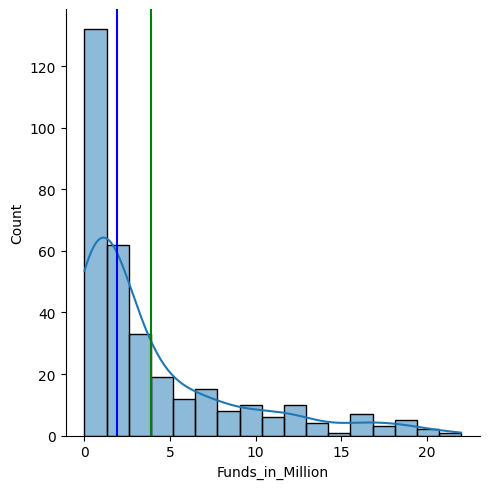

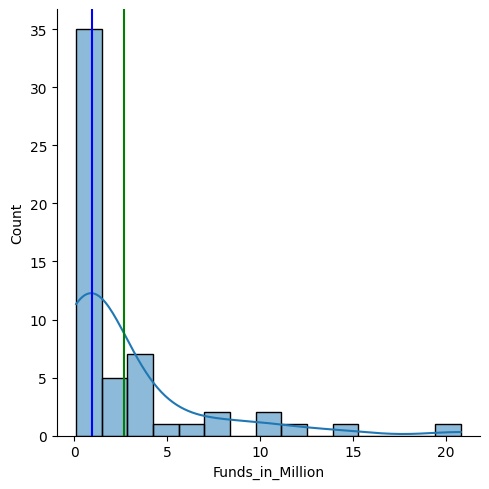

In [78]:
# A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
# Dropping Outliers
df.drop(df[df.Funds_in_Million>upper_fence].index,inplace=True)
# Plotting distribution
temp_df = df.loc[(df.OperatingState == 'Operating') | (df.OperatingState == 'Acquired') | (df.OperatingState == 'Ipo'),'Funds_in_Million']
sns.displot(temp_df, kde=True)
plt.axvline(x=temp_df.mean(), color='green')
plt.axvline(x=temp_df.median(), color='blue')
plt.show()

temp_df=df.loc[df.OperatingState=='Closed','Funds_in_Million']
sns.displot(temp_df, kde=True)
plt.axvline(x=temp_df.mean(), color='green')
plt.axvline(x=temp_df.median(), color='blue')
plt.show()

From the distribution plots looking at median and mean it looks like there is no much significance differance between Funds raised by companies that are still operating vs companies that closed down


In [79]:
'''
B. Write the null hypothesis and alternative hypothesis.
C. Test for significance and conclusion

Null hypothesis (Ho) : There is no difference between the two means : mu1-mu2==0
Alternate hypothesis (Ha) : There is significant difference between the two means: mu1-mu2 != 0

# Performing 2 sample t test

'''
s1 = df.loc[(df.OperatingState == 'Operating') | (df.OperatingState == 'Acquired') | (df.OperatingState == 'Ipo'),'Funds_in_Million']
s2 = df.loc[(df.OperatingState == 'Closed'),'Funds_in_Million']

#Lets consider a significance level of 5%
alpha=0.05 

from statsmodels.stats.weightstats import ztest
t,p=ztest(s1,s2)

print(' t= ',t, 'p = ',p)


 t=  1.7883620640833133 p =  0.07371761259942369


Since P (0.07) is >= alpha (0.5); hence we fail to reject null hypothesis

In [80]:
# D. Make a copy of the original data frame

df1 = data.copy(deep=True)
df1.head()

Startup             Product Funding             Event  \
0           2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1             3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2      3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3       3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4  42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   

            Result OperatingState  
0       Contestant      Operating  
1       Contestant         Closed  
2       Contestant      Operating  
3  Audience choice      Operating  
4       Contestant      Operating

In [81]:
# E. Check frequency distribution of Result variables
df1.Result.value_counts()


Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

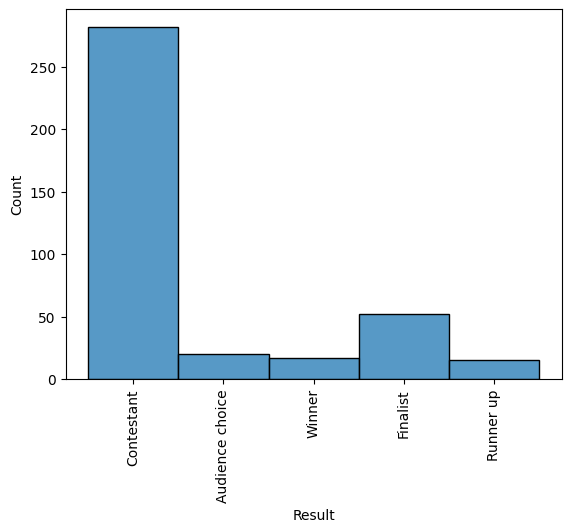

In [82]:
sns.histplot(data=df,x= 'Result')
plt.xticks(rotation=90)
plt.show()

In [83]:
# F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating
Winner_operating=df1.loc[(df1.OperatingState == 'Operating') & (df1.Result == 'Winner')].shape[0]
Winner=df1.loc[(df1.Result == 'Winner')].shape[0]

print(f'percentage of winners that are still operating {Winner_operating/Winner}')

Contestant_operating=df1.loc[(df1.OperatingState == 'Operating') & (df1.Result == 'Contestant')].shape[0]
Contestant=df1.loc[(df1.Result == 'Contestant')].shape[0]

print(f'percentage of Contestant that are still operating {Contestant_operating/Contestant}')


percentage of winners that are still operating 0.7307692307692307
percentage of Contestant that are still operating 0.680327868852459


In [84]:
# G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants
# H. Test for significance and conclusion
#We are using 2 sample z-test propprtions
#Null hyputhesis (Ho): The proportion of companies that are operating is the same in both categories - winners and contestants

#Alternative hypothesis (Ha): The proportion of companies that are operating is significantly different from each other, among the two categories

from statsmodels.stats.proportion import proportions_ztest

proportions_ztest([Contestant_operating, Winner_operating],[Contestant,Winner])


(-0.5385395313322552, 0.5902046211143621)

Since the p-value, 0.59>0.05(alpha) The proportion of companies that are operating is the same in both categories,

Rejecting the alternate hypothesis




In [85]:
# I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards

events=df1[df1.Event.apply(lambda x:'Disrupt' in x and int(x[-4:])>2012)].Event
print(events)

0          Disrupt SF 2013
1         Disrupt NYC 2013
2          Disrupt SF 2016
3          Disrupt NY 2016
4         Disrupt NYC 2013
              ...         
646    Disrupt London 2015
648    Disrupt London 2015
653        Disrupt EU 2014
656       Disrupt NYC 2013
660        Disrupt SF 2013
Name: Event, Length: 276, dtype: object
